<a href="https://colab.research.google.com/github/georgegherghe/openrpa/blob/master/StockPricePredictionX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [396]:
#Import the lib
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [397]:
#Get the stock quote
st = 'CEQP'
last_day = '2021-02-21'
df = web.DataReader(st, data_source='yahoo', start='2012-01-01', end=last_day)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,147.173141,143.404007,144.876328,143.816254,106431.0,55.628059
2012-01-04,144.876328,143.109543,143.698471,143.698471,117247.0,55.582478
2012-01-05,144.817429,143.168427,143.698471,143.639572,89400.0,55.559715
2012-01-06,143.992935,142.049469,143.639572,143.050644,94765.0,55.331928
2012-01-09,143.757355,141.224976,143.757355,142.108368,87821.0,54.967449
...,...,...,...,...,...,...
2021-02-12,22.500000,21.570000,21.750000,22.309999,397900.0,22.309999
2021-02-16,22.959999,22.240000,22.700001,22.430000,497700.0,22.430000
2021-02-17,22.730000,21.940001,22.600000,22.549999,492600.0,22.549999


In [398]:
#Get the number of rows & columns
df.shape

(2298, 6)

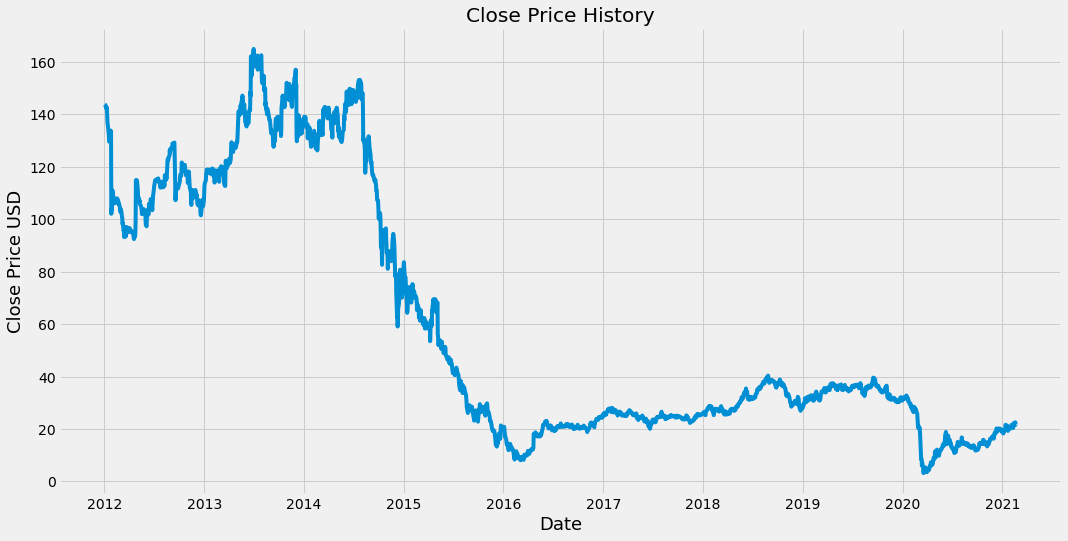

In [399]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()


In [400]:
#Create a new dataframe only with close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1839

In [401]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.86961199],
       [0.86888359],
       [0.86851934],
       ...,
       [0.11966605],
       [0.11372913],
       [0.11447124]])

In [402]:
#Create the training data set
#Create the scaled data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train dataset
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.86961199, 0.86888359, 0.86851934, 0.86487724, 0.85904993,
       0.86232778, 0.85613622, 0.83865411, 0.82663514, 0.80405412,
       0.79713416, 0.78147309, 0.79895521, 0.80769622, 0.79057835,
       0.80551101, 0.80623942, 0.61138684, 0.63287527, 0.66674681,
       0.66019105, 0.65035734, 0.65399944, 0.63724577, 0.63578892,
       0.63651737, 0.64088788, 0.63797418, 0.63833842, 0.64052368,
       0.64307313, 0.64598683, 0.64780788, 0.64343733, 0.63506052,
       0.63578892, 0.63506052, 0.62850471, 0.62377001, 0.6161216 ,
       0.61867105, 0.62194895, 0.61138684, 0.60483104, 0.60118893,
       0.58734896, 0.58953422, 0.5713237 , 0.5738732 , 0.55639108,
       0.55784793, 0.56185424, 0.56549634, 0.55784793, 0.58042896,
       0.57569425, 0.5709595 , 0.56840999, 0.57860791, 0.57533   ])]
[0.5676815927746494]

[array([0.86961199, 0.86888359, 0.86851934, 0.86487724, 0.85904993,
       0.86232778, 0.85613622, 0.83865411, 0.82663514, 0.80405412,
       0.79713416, 0.78147309, 0.798

In [403]:
#Convert the x_train and y_train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [404]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1779, 60, 1)

In [405]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [406]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [407]:
#Train the model .
model.fit(x_train, y_train, batch_size=1, epochs=1)

1779/1779 [==============================] - 49s 26ms/step - loss: 0.0045


In [408]:
#Create the testing dataset
#Create a new array containing scaled values form 1231 to 1291
test_data = scaled_data[training_data_len - 60:, :]
#Create the data set x_test, y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [409]:
#Convert the data to a numpy array
x_test = np.array(x_test)


In [410]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [411]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [412]:
#Get the Root Mean Squared Error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1.7813416942059186

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


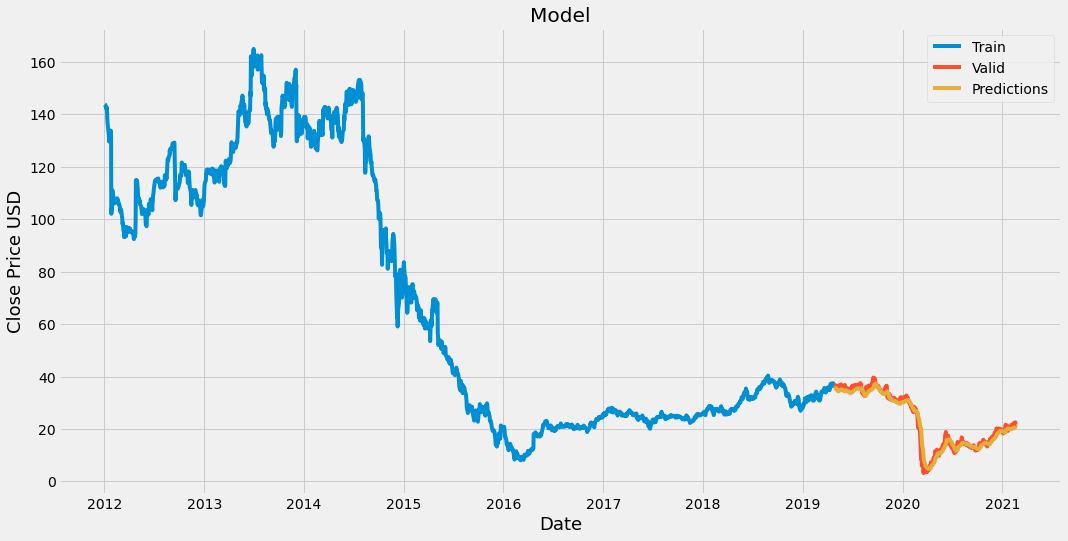

In [413]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper right')
plt.show()


In [414]:
#Show the valid & predicted prices
valid

,Close,Predictions
Date,,
2019-04-26,36.570000,35.651508
2019-04-29,36.700001,35.638382
2019-04-30,36.689999,35.620316
2019-05-01,36.430000,35.601021
2019-05-02,35.310001,35.557938
...,...,...
2021-02-12,22.309999,20.372198
2021-02-16,22.430000,20.552021
2021-02-17,22.549999,20.766079


In [418]:
#Get the quote
aaoi_quote = web.DataReader(st, data_source='yahoo', start='2012-01-01', end=last_day)
#Create a new dataframe
new_df = aaoi_quote.filter(['Close'])
#Get the last 60 days closing price and convert the dataset to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
print(rmse)

[[21.153791]]
1.7813416942059186


In [419]:
#Get the quote
aaoi_quote2 = web.DataReader(st, data_source='yahoo', start=last_day, end=last_day)
print(aaoi_quote2['Close'])

KeyError: ignored